# Locating a new retirement community
* 🔬 Data Science
* 🥠 Predictive Modeling
* 👟 Ready To Run!

This notebook demonstrates the utility of a number of spatial analysis methods including hot spot analysis, data clustering, defining drive time or distance areas, and attribute query. It also discusses several spatial analysis topics such as modeling supply versus demand, the small numbers problem, and boundary effects.

## A moving target

An analyst of market research for a company that develops, designs, and manages resort-style retirement communities has been tasked with identifying candidate locations for a new facility. He knows he needs to be creative. While it may have been sufficient in the United States ten years ago to build sprawling developments in the warmest parts of the country, people approaching retirement today are not as willing to relocate. Many want to stay connected to friends and family, remain close to existing doctors, continue to work, to enjoy local cultural and educational opportunities, and to be surrounded by people of all ages. Consequently, as a first pass, he decides to look for locations projected to have large numbers of senior citizens but very few existing options for residential retirement. He will then narrow these locations by ranking how similar each candidate is to the company's current most successful resort retirement community.

![](locating_community_images/image1.png)

<div class="alert alert-success">
**Note:** While the data used for the analyses outlined here are real, specific information about the company, as well as the proposed recommendations and final conclusions, are presented for illustrative purposes only.
</div>

### What data is needed?

The analyst will first model supply versus demand for retirement housing opportunities.

For the demand component of his model, he needs a variable representing potential retirement community residents. Since a new facility will not be open for a couple years, he obtains the projected 2019 age 55 and older population data, by ZIP Code, from [Business Analyst](https://www.esri.com/en-us/arcgis/products/arcgis-business-analyst/overview).

The supply component of the model proves a bit more difficult. Retirement facilities range from private homes accommodating one or two people to whole villages housing as many as 100,000 residents. While he can easily get the number of businesses within each ZIP Code that are classified as retirement communities, retirement homes, independent living facilities, or senior citizen housing (SIC codes 805904, 805918, and 836114), his [business data](http://doc.arcgis.com/en/esri-demographics/data/business.htm) does not include information about the number of residents or the number of residential units associated with each facility.

He decides to use the number of employees associated with these facilities as a surrogate for retirement community size, at least until better information is available.

![](locating_community_images/image2.png)

He also gets housing unit vacancy data from [Business Analyst](https://www.esri.com/en-us/arcgis/products/arcgis-business-analyst/overview) since locations with high vacancy rates generally reflect low demand for new housing.

### Where is the demand for retirement housing highest in relation to supply?
While it may be tempting to calculate supply versus demand as a simple ratio—projected age 55+ population, divided by an estimate of retirement community housing resources (number of employees, for now)—this is problematic for at least three reasons:

1. **Division by zero**: For ZIP Codes without any retirement community facilities, the denominator will be zero and the ratio will be undefined. If these ZIP Codes are removed from the analysis as a workaround, it will eliminate most of the ZIP Codes in the contiguous United States (see the map below) and will likely remove the very high-demand locations the analyst is hoping to discover.


2. **Small numbers problem**: Extreme ratios due to small numerators and small denominators can also be a problem because they are unstable. The best example of this is mortality rates. Suppose you have a community with only two people and one dies from cancer. The cancer mortality rate for this community would be a very high 50 percent, an outlier that could throw off subsequent analyses. Similarly, a ZIP Code with very few senior citizens and very few retirement housing resources will result in ratios that are unstable.

![ZIP Codes impacted by zero divide or the small numbers problem.](locating_community_images/image3.png)


3. **Boundaries**: In addition, looking at a ZIP Code in isolation can be misleading. If a ZIP Code has lots of residential retirement opportunities and very few senior citizens, we might say it has more supply than demand. But what if it is surrounded by ZIP Codes with lots of senior citizens and no residential retirement opportunities? We will get a better picture of supply and demand if we evaluate each ZIP Code within the context of its neighboring ZIP Codes.
Spatial Outliers

![A number of high-supply ZIP Codes are surrounded by low-supply ZIP Codes.](locating_community_images/image4.png)

To address the division by zero and small numbers problems, the analyst creates a level of service variable (*L*). The underlying assumption for the level of service variable is one of equity. If a ZIP Code contains 8 percent of the Country's projected 55+ population, it should also contain 8 percent of the Country's retirement community resources.

How does he construct this variable? It's easy. He subtracts a supply ratio from a demand ratio:

\begin{align}
\frac{{d_i}}{{D}} - \frac{r_i}{R} = {L}\\   
\end{align}

The demand ratio **($d_{i}$/D)** is the projected age 55+ population in a ZIP Code,  ($d_{i}$), divided by the projected age 55+ population in all ZIP Codes ($D$). Because the denominator is a count of all age 55 or older people in all ZIP Codes, it will never be zero or small (unstable).

Similarly, the supply ratio,**($r_{i}$/R)**, is the estimated number of retirement community employees in a ZIP Code ($r_{i}$), divided by the total number of retirement community employees in all ZIP Codes ($R$).

Here are some examples of how this plays out:

* Supply is equal to demand: When supply equals demand, $L$ is zero. Suppose a ZIP Code contains 5 percent of the Country's senior citizens and 5 percent of the Country's retirement community employees. When you subtract the supply ratio from the demand ratio (5 - 5 = 0), the result is zero.
* Demand exceeds supply: When demand for retirement housing is larger than supply, $L$ is a positive number. Suppose a ZIP Code contains 10 percent of the Country's senior citizen population but only 2 percent of the Country's residential retirement employees. When you subtract the supply ratio from the demand ratio (10 - 2 = 8), the result is a positive number.
* Supply exceeds demand: When the supply of retirement housing opportunities is larger than demand, on the other hand, $L$ is a negative number. For example, if you have a ZIP Code containing 3 percent of all senior citizens but 12 percent of all residential retirement employees, the difference (3 - 12 = -9) is a negative number.

To address the boundary issue, the analyst uses Hot Spot Analysis on the level of service variable ($L$) which balances the surpluses or deficits within each ZIP Code with the surpluses and deficits for surrounding ZIP Codes. A spatial cluster of large positive values that is not balanced by nearby negative values will be identified as a hot spot for demand. Similarly, a spatial cluster of negative values that isn't balanced by nearby positive values will be identified as a cold spot for demand. The map below shows the results of this analysis.

![](locating_community_images/image6.png)

High-demand, undersupplied areas are shown in red; low-demand, oversupplied areas are shown in blue.

## Where are vacancy rates lowest? Which areas are projected to have the largest number of people age 55 and older?

Next, the analyst will take into account vacancy rates (2014) and the projected (2019) number of people, age 55 and older, across the country. The hot spot analysis maps for these variables are shown below.

![](locating_community_images/image7.png)

The red areas have high housing unit vacancy rates.

![](locating_community_images/image8.png)

Red regions are projected to have the largest numbers of age 55 and older people in 2019.

### Where are vacancies lowest and demand for retirement housing highest?
The analyst selects ZIP Codes within statistically significant hot or cold spot areas that meet all of these criteria:

* High demand and low supply of retirement housing opportunities
* Low housing unit vacancy rates
* Large projected age 55 and older populations

He finds that there are 898 ZIP Codes satisfying all three of these criteria. These become the candidate ZIP Codes for further analysis.

![](locating_community_images/image9.png)

ZIP Codes associated with lowest vacancies and highest demand

# Get the data for your analysis

In [1]:
from arcgis import GIS

In [2]:
gis = GIS("https://deldev.maps.arcgis.com", "demos_deldev", "DelDevs12")

Search for the **LocatingRetirementCommunity** layer. You can specify the owner's name to get more specific results. To search for content from the Living Atlas, or content shared by other users on ArcGIS Online, set `outside_org=True`.

In [3]:
items = gis.content.search('title: LocatingRetirementCommunity owner:lscott_ANGP', 'Feature layer',
                           outside_org=True)

Display the list of results.

<Item title:"LocatingRetirementCommunity" type:Feature Layer Collection owner:lscott_ANGP>
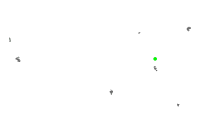

In [4]:
from IPython.display import display

for item in items:
    display(item)

Since the first item is a Feature Layer Collection, accessing the layers property will give us a list of FeatureLayer objects.

In [5]:
lyrs = items[0].layers

In [6]:
for lyr in lyrs:
    print(lyr.properties.name)

TargetCommunity
Candidates


The Feature Layer Collection includes two layers. The first layer, called **Target Communities**, contains the current best performing retirement community near Knoxville, Tennessee. The second layer, called **Candidates**, contains the 898 ZIP Codes in the continental USA associated with statistically significant hot or cold spot areas for all of these criteria:

* High demand for retirement housing opportunities
* Low supply of retirement housing
* Low housing unit vacancy rates
* Large projected age 55 and older populations

Hot spot analysis to identify these candidate ZIP Codes was done using ArcMap. If you want to run through this analysis yourself, it is included in both the [ArcMap and ArcGIS Pro workflows]( http://desktop.arcgis.com/en/analytics/case-studies/locating-a-new-retirement-community.htm).


In the workflow below, you will be using ArcGIS API for Python to create a 5-mile drive distance around the best performing community and obtaining [tapestry](http://www.esri.com/landing-pages/tapestry) and demographic data for the area. You will then obtain the same data for the candidate ZIP Codes. Finally, you will use the Find Similar Locations tool to identify the top four high demand, low vacancy, large projected age 55+ population ZIP Codes that are most similar to the area surrounding the best performing community.

In [7]:
target_community = lyrs[0]
candidates = lyrs[1]

In [8]:
m = gis.map('Knoxville')
m.add_layer(target_community)
m

MapView(layout=Layout(height='400px', width='100%'))

![](locating_community_images/target_community.png)

### Create a 5-mile drive time polygon around the best performing community.

### Proximity analysis


Proximity analysis tools help you answer one of the most common questions posed in spatial analysis: What is near what?

Proximity tools are available in the `features.use_proximity` module of ArcGIS API for Python. You can use the `create_drive_time_areas` tool to create a 5-mile drive distance buffer around the best performing community.

In [9]:
from arcgis.features.use_proximity import create_drive_time_areas

In [10]:
target_area = create_drive_time_areas(target_community, break_values=[5], break_units='Miles',
                        overlap_policy='Overlap',
                        output_name='drive time areas of target community1111')

In [11]:
target_area

<Item title:"drive time areas of target community1111" type:Feature Layer Collection owner:demos_deldev>

In [28]:
target_area_map = gis.map('Knoxville')

In [29]:
target_area_map

MapView(layout=Layout(height='400px', width='100%'))

![](locating_community_images/target_data.png)

In [31]:
target_area_map.add_layer(target_area)

### Determine the top tapestry segments.
You will be looking for ZIP Codes that are similar to the area surrounding the best performing retirement community. You will take advantage of [tapestry variables](https://www.esri.com/en-us/arcgis/products/tapestry-segmentation/overview) because they summarize so many aspects of a population, such as age, income, home value, occupation, education, and consumer spending behaviors. To identify the top tapestries within the 5-mile drive distance area, you will obtain and compare all 68 tapestry segments. You will also obtain the tapestry base variable so you can calculate percentages.

In [13]:
from arcgis.gis import GIS
from arcgis.geoenrichment import *
countries = get_countries()
usa = Country.get('US')
type(usa)
df = usa.data_collections
# lifemodegroups_var = list(df.loc['lifemodegroupsNEW']['analysisVariable'].unique())
tapestryhouseholds_var = list(df.loc['tapestryhouseholdsNEW']['analysisVariable'].unique())
extra_var = ["AtRisk.THHBASE","KeyUSFacts.POPGRWCYFY","AtRisk.TOTPOP_CY","industry.UNEMPRT_CY"]

In [14]:
analysis_var =  tapestryhouseholds_var + extra_var

In [15]:
analysis_var

['tapestryhouseholdsNEW.TSEGNUM',
 'tapestryhouseholdsNEW.TSEGCODE',
 'tapestryhouseholdsNEW.TSEGNAME',
 'tapestryhouseholdsNEW.THHBASE',
 'tapestryhouseholdsNEW.THH01',
 'tapestryhouseholdsNEW.THH02',
 'tapestryhouseholdsNEW.THH03',
 'tapestryhouseholdsNEW.THH04',
 'tapestryhouseholdsNEW.THH05',
 'tapestryhouseholdsNEW.THH06',
 'tapestryhouseholdsNEW.THH07',
 'tapestryhouseholdsNEW.THH08',
 'tapestryhouseholdsNEW.THH09',
 'tapestryhouseholdsNEW.THH10',
 'tapestryhouseholdsNEW.THH11',
 'tapestryhouseholdsNEW.THH12',
 'tapestryhouseholdsNEW.THH13',
 'tapestryhouseholdsNEW.THH14',
 'tapestryhouseholdsNEW.THH15',
 'tapestryhouseholdsNEW.THH16',
 'tapestryhouseholdsNEW.THH17',
 'tapestryhouseholdsNEW.THH18',
 'tapestryhouseholdsNEW.THH19',
 'tapestryhouseholdsNEW.THH20',
 'tapestryhouseholdsNEW.THH21',
 'tapestryhouseholdsNEW.THH22',
 'tapestryhouseholdsNEW.THH23',
 'tapestryhouseholdsNEW.THH24',
 'tapestryhouseholdsNEW.THH25',
 'tapestryhouseholdsNEW.THH26',
 'tapestryhouseholdsNEW.THH27'

In [80]:
var=[]
for item in analysis_var:
    split = item.split('.')
    var.append(split[1]) 

In [22]:
result=[]
for item in analysis_var:
    split = item.split('.')
    if split[0]=='tapestryhouseholdsNEW':
        if split[1] not in result:
            result.append(split[1])
        else: pass   

### Enriching study areas


The `enrich_layer` tool gives you demographic and landascape data for the people, places, and businesses in a specific area, or within a selected travel time or distance from a location.

To obtain the tapestry and demographic data for the area, we will use `enrich_layer` tool fromm the enrich_data module.

In [16]:
from arcgis.features.enrich_data import enrich_layer

In [17]:
target_area_data = enrich_layer(target_area,
                                analysis_variables=analysis_var,
                                output_name="get enriched results1111")

In [18]:
target_area_data

<Item title:"get enriched results1111" type:Feature Layer Collection owner:demos_deldev>

In [19]:
data_lyr = target_area_data.layers[0]

Convert the layer into pandas dataframe to analyze top 4 tapestries. Determine the top four tapestries associated with the largest counts. 

In [20]:
import pandas as pd

sdf = pd.DataFrame.spatial.from_layer(data_lyr)
sdf.head()

,AnalysisArea,ENRICH_FID,FAMGRW10_14,FacilityOID,FromBreak,HasData,ID,ID_1,Name,OBJECTID,...,UNEMPRT_CY_1,ZIP,aggregationMethod,apportionmentConfidence,p14Seg1B,p14Seg5A,p14Seg5B,p14Seg8C,populationToPolygonSizeRating,sourceCountry
0,31.432614,1,0.48,1,0.0,1,Best Performing Community,0,Location 1 : 0 - 5.0,1,...,2.4,37922,BlockApportionment:US.BlockGroups,2.576,0.107575,0.107499,0.207002,0.104505,2.191,US


In [23]:
df = sdf[result]
df.select_dtypes(include=['float64','int64']).T.sort_values(by=0, ascending=False).head().index

Index(['THHBASE', 'THHGRPU3', 'THHGRPU4', 'THHGRPL5', 'THHGRPL1'], dtype='object')

### Convert the top four target area tapestry counts to percentages.
Rather than counts, you will want to compare tapestry percentages between each candidate ZIP Code and the target area.

Create four new fields to hold the tapestry percentages.<br>
You can create a feature layer instance to add new fields into your layer.

A feature service serves a collection of feature layers and tables, with the associated relationships among the entities. It is represented by arcgis.features.FeatureLayerCollection in the ArcGIS Python API.

Instances of FeatureLayerCollection can be constructed using a feature service, as shown below:

In [24]:
from arcgis.features import FeatureLayerCollection

In [25]:
target_data = FeatureLayerCollection.fromitem(target_area_data)

The collection of layers and tables in a FeatureLayerCollection can be accessed using the layers and tables properties respectively:

In [26]:
data_layer = target_data.layers[0]

In [27]:
data_layer.manager.add_to_definition({"fields":[{"name":"THHGRPU3PERC",
                                                 "type":"esriFieldTypeDouble",
                                                 "alias":"2017 HHs: Urbanization Group 3 PERC",
                                                 "nullable":True,"editable":True,"length":256}]})

{'success': True}

In [28]:
data_layer.manager.add_to_definition({"fields":[{"name":"THHGRPU4PERC",
                                         "type":"esriFieldTypeDouble",
                                         "alias":"2017 HHs: Urbanization Group 4 PERC",
                                         "nullable":True,"editable":True,"length":256}]})

{'success': True}

In [29]:
data_layer.manager.add_to_definition({"fields":[{"name":"THHGRPL5PERC",
                                         "type":"esriFieldTypeDouble",
                                         "alias":"2017 HHs: LifeMode Group 5 PERC",
                                         "nullable":True,"editable":True,"length":256}]})

{'success': True}

In [30]:
data_layer.manager.add_to_definition({"fields":[{"name":"THH17PERC",
                                         "type":"esriFieldTypeDouble",
                                         "alias":"2017 HHs in Tapestry Seg 5B PERC",
                                         "nullable":True,"editable":True,"length":256}]})

{'success': True}

Refresh to update the fields in your layer.

In [31]:
target_data.manager.refresh()

{'success': True}

In [32]:
df = pd.DataFrame.spatial.from_layer(data_layer)

In [33]:
df[['THHGRPU4PERC','THHGRPU3PERC','THHGRPL5PERC','THH17PERC']]

,THHGRPU4PERC,THHGRPU3PERC,THHGRPL5PERC,THH17PERC
0,0.0,0.0,0.0,0.0


Calculate percentage and add to the fields.

In [34]:
data_layer.calculate('1=1', 
                     calc_expression=[{"field":"THHGRPU3PERC","sqlExpression":"THHGRPU3 / THHBASE"}])

{'success': True, 'updatedFeatureCount': 1}

In [35]:
data_layer.calculate('1=1', 
                     calc_expression=[{"field":"THHGRPU4PERC","sqlExpression":"THHGRPU4 / THHBASE"}])

{'success': True, 'updatedFeatureCount': 1}

In [36]:
data_layer.calculate('1=1', 
                     calc_expression=[{"field":"THHGRPL5PERC","sqlExpression":"THHGRPL5 / THHBASE"}])

{'success': True, 'updatedFeatureCount': 1}

In [37]:
data_layer.calculate('1=1', 
                     calc_expression=[{"field":"THH17PERC","sqlExpression":"THH17 / THHBASE"}])

{'success': True, 'updatedFeatureCount': 1}

In [38]:
sf = pd.DataFrame.spatial.from_layer(data_layer)

In [39]:
sf[['THHGRPU3PERC', 'THHGRPU4PERC', 'THHGRPL5PERC', 'THH17PERC']]

,THHGRPU3PERC,THHGRPU4PERC,THHGRPL5PERC,THH17PERC
0,0.414781,0.329764,0.295488,0.200269


### Obtain the same data for the candidate ZIP Codes.


In [40]:
candidates_data = enrich_layer(candidates,
                                analysis_variables=analysis_var, output_name="enrich candidates with tapestry11")

In [41]:
cand_data = FeatureLayerCollection.fromitem(candidates_data)

In [42]:
cand_layer = cand_data.layers[0]

In [43]:
cand_layer.manager.add_to_definition({"fields":[{"name":"THHGRPU3PERC",
                                                 "type":"esriFieldTypeDouble",
                                                 "alias":"2017 HHs: Urbanization Group 3 PERC",
                                                 "nullable":True,"editable":True,"length":256}]})

{'success': True}

In [44]:
cand_layer.manager.add_to_definition({"fields":[{"name":"THHGRPU4PERC",
                                         "type":"esriFieldTypeDouble",
                                         "alias":"2017 HHs: Urbanization Group 4 PERC",
                                         "nullable":True,"editable":True,"length":256}]})

{'success': True}

In [45]:
cand_layer.manager.add_to_definition({"fields":[{"name":"THHGRPL5PERC",
                                         "type":"esriFieldTypeDouble",
                                         "alias":"2017 HHs: LifeMode Group 5 PERC",
                                         "nullable":True,"editable":True,"length":256}]})

{'success': True}

In [46]:
cand_layer.manager.add_to_definition({"fields":[{"name":"THH17PERC",
                                         "type":"esriFieldTypeDouble",
                                         "alias":"2017 HHs in Tapestry Seg 5B PERC",
                                         "nullable":True,"editable":True,"length":256}]})

{'success': True}

In [47]:
rf = pd.DataFrame.spatial.from_layer(cand_layer)

In [48]:
rf.THHBASE.sort_values().head()

789    0.0
469    0.0
715    0.0
854    0.0
369    0.0
Name: THHBASE, dtype: float64

 Notice that some of the base counts are zero. If you try to create the percentages with these zero values, you will get a zero divide. Filter these zero (or very small) population ZIP Codes, excluding them from further analysis.

In [49]:
cand_layer.calculate('THHBASE > 0', 
                     calc_expression=[{"field":"THHGRPU3PERC","sqlExpression":"THHGRPU3 / THHBASE"}])

{'success': True, 'updatedFeatureCount': 886}

In [50]:
cand_layer.calculate('THHBASE > 0', 
                     calc_expression=[{"field":"THHGRPU4PERC","sqlExpression":"THHGRPU4 / THHBASE"}])

{'success': True, 'updatedFeatureCount': 886}

In [51]:
cand_layer.calculate('THHBASE > 0', 
                     calc_expression=[{"field":"THHGRPL5PERC","sqlExpression":"THHGRPL5 / THHBASE"}])

{'success': True, 'updatedFeatureCount': 886}

In [52]:
cand_layer.calculate('THHBASE > 0', 
                     calc_expression=[{"field":"THH17PERC","sqlExpression":"THH17 / THHBASE"}])

{'success': True, 'updatedFeatureCount': 886}

In [53]:
cf = pd.DataFrame.spatial.from_layer(cand_layer)

In [54]:
cf[['THHGRPU3PERC', 'THHGRPU4PERC', 'THHGRPL5PERC', 'THH17PERC']]

,THHGRPU3PERC,THHGRPU4PERC,THHGRPL5PERC,THH17PERC
0,0.000000,0.771362,0.176322,0.000000
1,0.037032,0.000000,0.000000,0.000000
2,0.000000,0.222418,0.000000,0.000000
3,0.000000,1.000000,0.000000,0.000000
4,0.000000,0.851347,0.000000,0.000000
5,0.000000,0.310435,0.000000,0.000000
6,0.000000,1.000000,0.000000,0.000000
7,0.057197,0.344327,0.000000,0.000000
8,0.109071,0.488638,0.000000,0.000000
9,0.067009,0.829081,0.000000,0.000000


### Rank the candidate ZIP Codes by their similarity to the target area.

In [55]:
from arcgis import *
gis = GIS("https://deldev.maps.arcgis.com", "demos_deldev", "DelDevs12")

In [56]:
from arcgis.features.find_locations import find_similar_locations

In [57]:
top_4_most_similar_results = find_similar_locations(data_layer,cand_layer,
                       analysis_fields=['THHGRPU3','THHGRPU4','THHGRPL5','THH17','POPDENS14','FAMGRW10_14','UNEMPRT_CY'],
                                        output_name = "top 4 similar locations111",
                                                    number_of_results=4)

In [58]:
top_4_most_similar_results

<Item title:"top 4 similar locations111" type:Feature Layer Collection owner:demos_deldev>

In [60]:
map1 = gis.map('Atlanta')
map1.add_layer(top_4_most_similar_results)

In [61]:
map2 = gis.map('Houston')
map2.add_layer(top_4_most_similar_results)

In [62]:
from ipywidgets import *

map1.layout=Layout(flex='1 1', padding='10px', height='420px')
map2.layout=Layout(flex='1 1', padding='10px', height='420px')

box = HBox([map1, map2])
box

HBox(children=(MapView(layout=Layout(flex='1 1', height='420px', padding='10px')), MapView(layout=Layout(flex='1 1', height='420px', padding='10px'))))

![](locating_community_images/hbox.png)

Two of the top ZIP Codes will be located near Houston and two will be located near Atlanta.

### References
Brennan, Morgan. 2012. "America's Friendliest Towns." Forbes, December 19, 2012. http://www.forbes.com/sites/morganbrennan/2012/12/19/americas-friendliest-towns/

City of Roswell, Georgia. "City Awards and Achievements." http://www.roswellgov.com/discover-us/city-awards-achievements

City of Taylor Lake Village, Texas. http://www.taylorlakevillage.us

Grunewald, Will. 2014. "How Baby Boomers Are Changing Retirement Living." Washingtonian, March 13, 2014. http://www.washingtonian.com/articles/people/how-baby-boomers-are-changing-retirement-living/

Heneghan, Carolyn. 2014. "The 50 Safest Cities in Georgia." The SafeWise Report, Safewise.com, February 17, 2014. http://www.safewise.com/blog/50-safest-cities-georgia/

Holley, Peter; Lomax, John; and Shilcutt, Katharine. 2014. "Where to Live Now: The 25 Hottest Neighborhoods of 2014." Houstonia, April 3, 2014. http://www.houstoniamag.com/articles/2014/4/3/where-to-live-now-hottest-neighborhoods-april-2014

Kilborn, Peter T. 2009. "In Depth: America's 25 Best Places to Move." Forbes, July 7, 2009. http://www.forbes.com/2009/07/07/relocate-relocation-cities-lifestyle-real-estate-affordable-moving_slide.html

Northern, Amanda. 2015. "Here Are The Best Places To Live In Georgia… And Why." OnlyInYourState.com, June 19, 2015. http://www.onlyinyourstate.com/georgia/best-places-to-live-in-ga/


### Photo Attribution

|                                                    	|                                                                                                                                                                                             	|
|----------------------------------------------------	|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|
| Robinwood Retirement Community                     	| Used with permission from Resort Lifestyle Communities                                                                                                                                      	|
| Lakeside houses on Clear Lake southeast of Houston 	| This photo was taken by Mike Fisher and is licensed under CC BY 2.0 via Wikimedia Commons—https://commons.wikimedia.org/wiki/File:Lakeside_Houses_in_Nassau_Bay_TX.jpg                      	|
| Seabrook, Texas                                    	| "Seabrook-tx-kemah-bridge." Licensed under CC BY-SA 2.5 via Wikimedia Commons—https://commons.wikimedia.org/wiki/File:Seabrook-tx-kemah-bridge.jpg#/media/File:Seabrook-tx-kemah-bridge.jpg 	|
| Memorial Park                                      	| Public domain license,https://commons.wikimedia.org/wiki/File:MemorialParkHouston.JPG                                                                                                       	|
| Alpharetta City Hall                               	| Public domain,https://commons.wikimedia.org/wiki/File:Alpharetta,_Georgia_City_Hall.jpg                                                                                                     	|
| Chattahoochee Nature Center near Roswell, Georgia  	| This photo was taken by WWALS Watershed Coalition and is licensed under CC BY 2.0 via Wikimedia Commons—https://commons.wikimedia.org/wiki/File:PaddlingUpperPondCNCApr6_2013.jpg           	|
| Smyrna Village Market                              	| Public domain,https://commons.wikimedia.org/wiki/File:Smyrna_Georgia_Market_Village.JPG                                                                                                     	|